# Simulated Data Generating Process

## Task: Simulate realistic data set with known treatment effects

###### Properties of the data generator: 

- High dimensional and non-linear data
- flexible
- user friendly

## Motivation

- Provide high quality data for research 

- Useful for you to test your models

## Model Equations

<br/>

$$ \begin{align} Y = \theta_0  D + g_0(X)+ U,  &&  & E[U|X,D]  \\ 
   D = m_0(X) + V, &&   &  E[V|X] = 0 \\
  \theta_0 =  t_0(Z) + W, && & E[W|Z] = 0, Z \subseteq X  \\
   \end{align}$$
   
Y - Outcome Variable

$\theta_0$ - True treatment effect 

D - Treatment Dummy

$X_{n*k}$ - Covariates

## Treatment Assignment
##### Random
Choose probability $m_0$

##### Conditioned covariates 
Weight vector  $\; b_{k*1} \stackrel{ind.}{\sim} U(0,1), \qquad a_{n*1} = X_{n*k} * b_{k*1}$

$$m_0(X) = \Phi\left(\frac{a-\hat{\mu}(a)}{\hat{\sigma}(a)}\right) $$

##### Create assignment vector
$D \stackrel{ind.}{\sim} Bernoulli(m_0)$


## Treatment effect

###### Option 1: Constant
$\theta_0 = c$

###### Option 2: Continuous heterogeneous effect

$Z \subseteq X,\quad Weight vector \quad b_{k*1} \stackrel{ind.}{\sim} U(0,1), \quad W \stackrel{ind.}{\sim} N(0,1)$

$$\gamma =  sin(Z * b)^2 + W$$


$$\theta_0 = \frac{\gamma - min(\gamma)}{max(\gamma) - min(\gamma)}(0.3 - 0.1)$$

###### Option 3: Negative 

$\theta_0 \stackrel{ind.}{\sim} U(-0.3,0)$

###### Option 4: No treatment effect

$\theta_0 = 0$


## Composition of dependent variable 

###### Non-linearity: 
$$g(X) = sin(X*b)^2 + U$$

###### Option 1: Continuous 
$$Y_i  = \theta_{0,i}  D_i + g_0(X_i)+ U_i$$

###### Option 2: Binary
$$p_i = \frac{Y_i - min(Y_i)}{max(Y_i) - min(Y_i)}(0.9 - 0.1)$$

<br/>

$$\theta_0 \stackrel{ind.}{\sim} Bernoulli(p_i)$$

## Application of module/package 

In [1]:
from SimulateData import UserInterface

u = UserInterface(N = 10000,k = 10, seed = 12)

u.generate_treatment(random_assignment = True,
                     assignment_prob = 0.5,
                     constant_pos = True,
                     constant_neg = False,
                     heterogeneous_pos = False,
                     heterogeneous_neg = False,
                     no_treatment = False,
                     treatment_option_weights = [0, 0, 0.7, 0.1, 0.2], # treatment_option_weights default: None 
                     # [constant_pos,constant_neg, heterogeneous_pos, heterogeneous_neg, no effect]
                     intensity = 5)

y, X, assignment_vector, treatment_effect = u.output_data(binary=False)
     


## Correlation Matrix of X

<IPython.core.display.Javascript object>


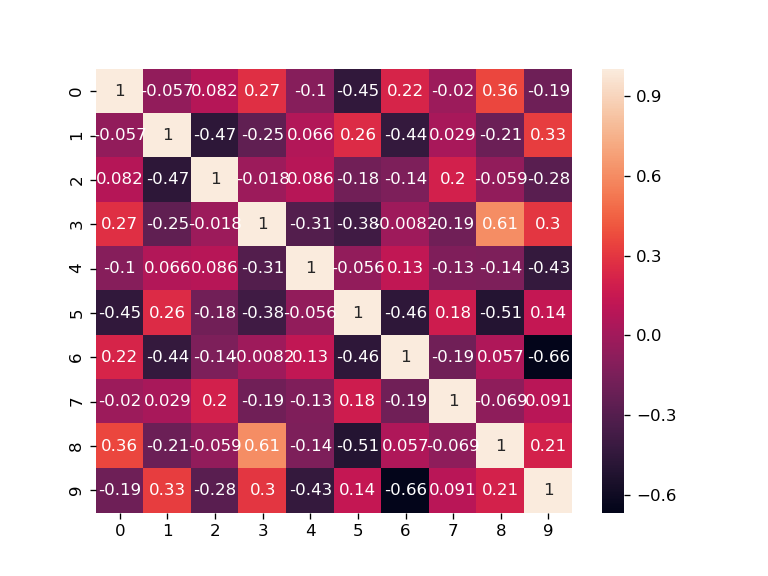

In [5]:
%matplotlib notebook
u.plot_covariates_correlation()

In [10]:
    from plot_functions import propensity_score_plt, all_treatment_effect_plt, single_treatment_effect_plt, output_difference_plt, avg_treatment_effect_plt 

    
    u = UserInterface(10000,10, seed=5)
    u.generate_treatment(random_assignment=False, treatment_option_weights = [1, 0, 0, 0, 0])
    y, X, assignment, treatment = u.output_data()
    
    prop_score_conditioned = u.get_propensity_scores()
    
    u = UserInterface(10000,10, seed=5)
    u.generate_treatment(random_assignment=True, assignment_prob = 0.5,  treatment_option_weights = [1, 0, 0, 0, 0])
    y, X, assignment, treatment = u.output_data()
    
    prop_score_random = u.get_propensity_scores()

## Distribution of propensity scores according to treatment assignment

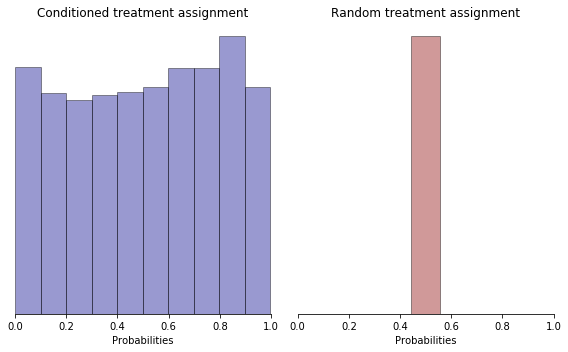

In [11]:
%matplotlib inline 
propensity_score_plt(prop_score_conditioned, prop_score_random)

In [7]:
import numpy as np
##### treatment effects plots

### Each option alone 
treatment_list = []
assignment_list = []

for i in range(4):
    treatment_option_weights = np.zeros(4)
    treatment_option_weights[i] = 1
    
    u = UserInterface(10000,10, seed=123)
    u.generate_treatment(random_assignment=True, treatment_option_weights = treatment_option_weights)
    y, X, assignment, treatment = u.output_data(binary=False)
    
    treatment_list.append(treatment)
    assignment_list.append(assignment)

## Treatment effect options 

### -- NEEDS ADJUSTMENTS --

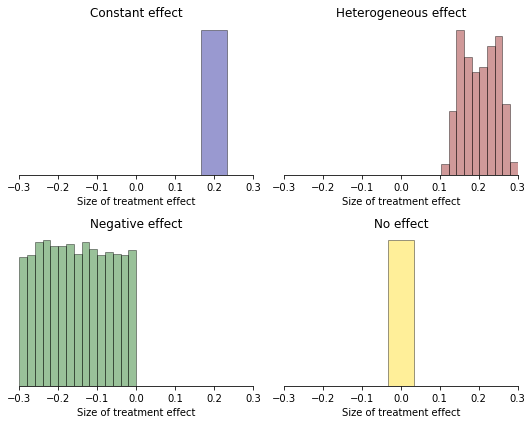

In [8]:
all_treatment_effect_plt(treatment_list, assignment_list)

In [12]:
##### Realistic case of treatment options

u = UserInterface(10000,10, seed=23)
u.generate_treatment(treatment_option_weights = [0, 0, 0.7, 0.1, 0.2])
y, X, assignment, treatment = u.output_data(binary=False)

## Customized treatment distribution

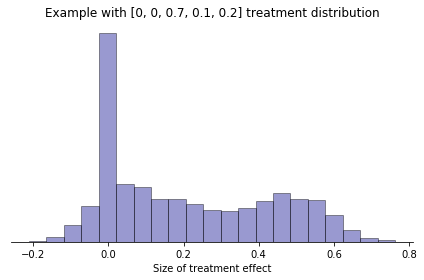

In [15]:
single_treatment_effect_plt(treatment, assignment, 
                            title = 'Example with [0, 0, 0.7, 0.1, 0.2] treatment distribution')

## Outputs depending on treatment assignment 

In [16]:
##### Output differences treated/not_treated plots

### continous 
u = UserInterface(10000,10, seed=7)
u.generate_treatment(random_assignment=True, treatment_option_weights = [0, 0, 1, 0, 0])
y, X, assignment, treatment = u.output_data(False)

y_treated = y[assignment==1]
y_not_treated = y[assignment==0]

<IPython.core.display.Javascript object>


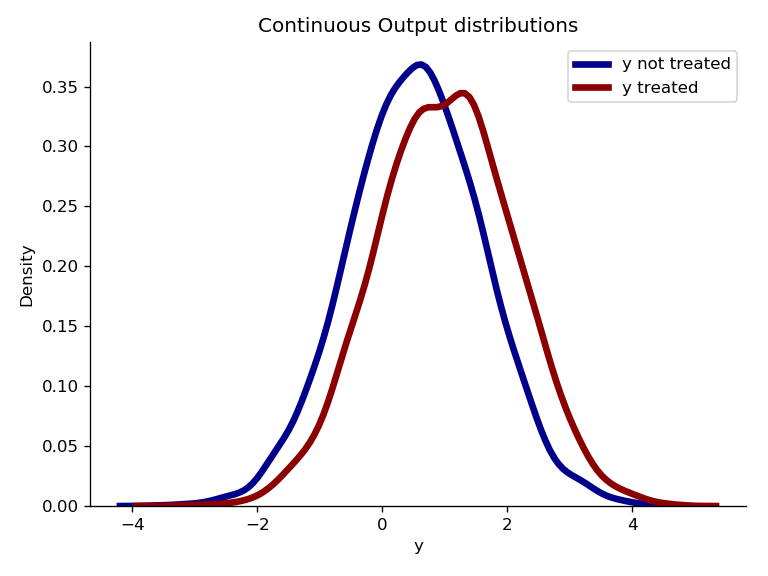

In [17]:
%matplotlib notebook
output_difference_plt(y_not_treated, y_treated)

In [18]:
### binary
u = UserInterface(10000,10, seed=15)
u.generate_treatment(random_assignment=True, treatment_option_weights = [0, 0, 1, 0, 0])
y, X, assignment, treatment = u.output_data(True)

y_treated = y[assignment==1]
y_not_treated = y[assignment==0]

<IPython.core.display.Javascript object>


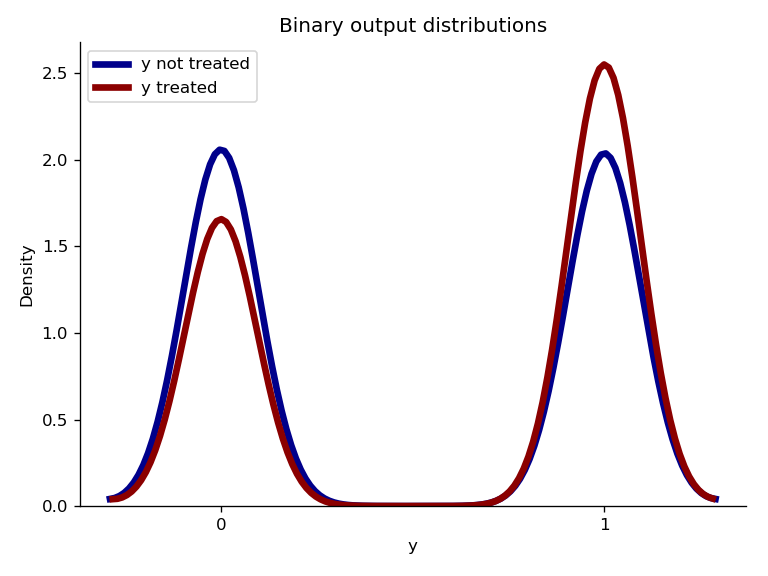

In [19]:
%matplotlib notebook
output_difference_plt(y_not_treated, y_treated, binary = True)

## Average Treatment Effect -- NEEDS ADJUSTMENTS -- 

In [15]:
##### ATE examples

treatment_list = []
assignment_list = []

# constant
u = UserInterface(10000,10, seed=15)
u.generate_treatment(random_assignment=True, treatment_option_weights = [1, 0, 0, 0])
y, X, assignment, treatment = u.output_data(True)

treatment_list.append(treatment)
assignment_list.append(assignment)

ate_constant = np.mean(y[assignment==1]) - np.mean(y[assignment==0])

# positive negative
u = UserInterface(10000,10, seed=15)
u.generate_treatment(random_assignment=True, treatment_option_weights = [0.5, 0, 0.5, 0])
y, X, assignment, treatment = u.output_data(True)

treatment_list.append(treatment)
assignment_list.append(assignment)

ate_pos_neg = np.mean(y[assignment==1]) - np.mean(y[assignment==0])

# all mixed
u = UserInterface(10000,10, seed=15)
u.generate_treatment(random_assignment=True, treatment_option_weights = [0.2, 0.5, 0.1, 0.2])
y, X, assignment, treatment = u.output_data(True)

treatment_list.append(treatment)
assignment_list.append(assignment)

ate_mix = np.mean(y[assignment==1]) - np.mean(y[assignment==0])

# 80% no effect
u = UserInterface(10000,10, seed=15)
u.generate_treatment(random_assignment=True, treatment_option_weights = [0, 0.2, 0, 0.8])
y, X, assignment, treatment = u.output_data(True)

treatment_list.append(treatment)
assignment_list.append(assignment)

ate_non = np.mean(y[assignment==1]) - np.mean(y[assignment==0])


ate_list = [ate_constant, ate_pos_neg, ate_mix, ate_non]

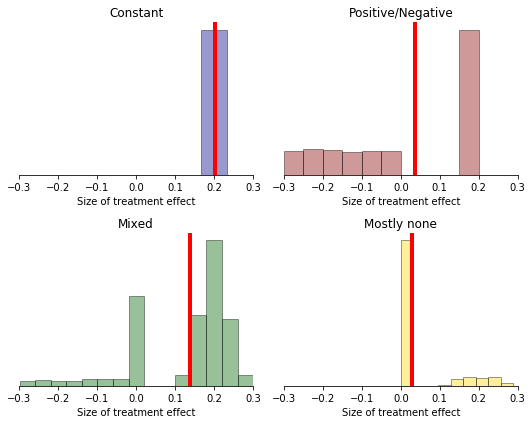

In [17]:
%matplotlib inline
avg_treatment_effect_plt(treatment_list, assignment_list, ate_list)

# Questions? 
# Answers?
# Ideas?